<a href="https://colab.research.google.com/github/isidoraperez2-gif/Portafolio/blob/etapa-3/Examen_Word_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predicción del Nivel de PIB utilizando Datos del Banco Mundial**

El objetivo de este proyecto es predecir el nivel de PIB de distintos países a partir de indicadores económicos, sociales y demográficos obtenidos del Banco Mundial.

El trabajo debe realizarse en tres etapas principales:

- Etapa 1: Análisis descriptivo e imputación de datos

- Etapa 2: Reducción de dimensionalidad con PCA

- Etapa 3: Modelación mediante algoritmos de clasificación

### **Etapa Previa**:

En github debe crear un repositorio llamado portfolios. Además debe crear tres ramas para cada una de las etapas. Recuerde que la rama  `main` debe contener todas las actualizaciones de su código por medio de una unión entre las ramas de las etapas junto con la rama principal.


En esta etapa inicial, se deberá configurar correctamente la estructura del proyecto utilizando GitHub como sistema de control de versiones.
- Crear un repositorio en GitHub con el nombre `portafolio`
- En el archivo `README.md` debe describir claramente la finalidad del proyecto. Puede apoyarse en las indicaciones descritas acá como referencia inicial; sin embargo, el contenido debe ser reformulado y contextualizado, de modo que el repositorio refleje un proyecto original, coherente y concebido por usted, tanto en su propósito como en su enfoque.
- A partir de la rama main, crear tres ramas, cada una asociada a una etapa del trabajo (por ejemplo: `etapa-1`, `etapa-2`, `etapa-3`). Cada rama deberá contener exclusivamente los avances correspondientes a su respectiva etapa.
- Realizar la extracción inicial de los datos desde la fuente del Banco Mundial y subir estos datos al repositorio en una carpeta denominada `main`.

**Indicaciones**
- Una vez finalizada cada etapa, los cambios desarrollados en la rama correspondiente deberán integrarse a la rama `main` mediante un proceso de unión (`merge`).
- La rama `main` debe reflejar, en todo momento, la versión más actualizada y consolidada del proyecto.


### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de aceurdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

### **Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

- Seleccionar únicamente variables numéricas y estandarizarlas previamente.
- Aplicar `PCA` y analizar la varianza explicada por cada componente.
- Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
- Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
- Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.


In [46]:
%pip install wbgapi

In [47]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/ciencia datos economia')

import my_func as fn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [49]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [50]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [51]:
#Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

Agregamos este codigo para tener una columna del PIB de fomra numerica y tambien de forma categoria (lo que nos servira para la etapa 3)

In [52]:
df_wb_raw['PIB_num'] = df_wb_raw['NY.GDP.MKTP.PP.KD']


In [53]:
import pandas as pd
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [54]:
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS,PIB_num
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266,8.526678e+10
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000,7.612916e+10
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377,2.769440e+10
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800,1.359364e+12
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313,1.030020e+09


### **ETAPA 1: Análisis Descriptivo e Imputación de Datos**

In [55]:
df_wb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 68 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   country                  198 non-null    object  
 1   Country                  198 non-null    object  
 2   NY.GDP.MKTP.PP.KD        198 non-null    category
 3   SP.POP.GROW              198 non-null    float64 
 4   SP.POP.TOTL              198 non-null    float64 
 5   SP.POP.TOTL.FE.IN        198 non-null    float64 
 6   SP.POP.TOTL.FE.ZS        198 non-null    float64 
 7   SP.POP.TOTL.MA.IN        198 non-null    float64 
 8   SP.POP.TOTL.MA.ZS        198 non-null    float64 
 9   SP.URB.GROW              198 non-null    float64 
 10  SP.URB.TOTL              198 non-null    float64 
 11  SP.URB.TOTL.IN.ZS        198 non-null    float64 
 12  SL.TLF.TOTL.FE.ZS        173 non-null    float64 
 13  SL.TLF.TOTL.IN           173 non-null    float64 
 14  SL.UEM.TOT

Identificar el número de países, años y variables disponibles.

In [56]:

df_wb_raw.shape

(198, 68)

In [57]:
df_wb_raw['country'].nunique()


198

In [58]:
df_wb_raw.columns

Index(['country', 'Country', 'NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL',
       'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN',
       'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS',
       'SL.TLF.TOTL.FE.ZS', 'SL.TLF.TOTL.IN', 'SL.UEM.TOTL.FE.NE.ZS',
       'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS',
       'SL.UEM.TOTL.NE.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS',
       'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS',
       'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS',
       'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD', 'SL.UEM.TOTL.ZS',
       'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD',
       'NE.CON.PRVT.CN', 'NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN',
       'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'BM.KLT.DINV.CD.WD',
       'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC',
       'EN.GHG.CO2.IP.MT.CE.AR5', 'GC.DOD.TOTL.CN', 'GC.DOD.T

Tenemos 198 observaciones, lo que significa que tenemos 198 Paises, con 68 columnas, si consideramos solo variables economicas tenemos 65 observaciones consideradas como variables. Y estamos estudiando el año 2023.

In [59]:
missing_value = df_wb_raw.isna().mean()*100
missing_value

,0
country,0.000000
Country,0.000000
NY.GDP.MKTP.PP.KD,0.000000
SP.POP.GROW,0.000000
SP.POP.TOTL,0.000000
...,...
EG.CFT.ACCS.UR.ZS,8.080808
IT.NET.USER.FE.ZS,71.212121
IT.NET.USER.MA.ZS,71.212121
IT.NET.USER.ZS,10.606061


Eliminamos las columnas que tienen mas de 15% de Nan en su contenido.

In [60]:
columns_to_drop = missing_value[missing_value > 15].index

In [61]:
columns_to_drop.shape

(26,)

Las borramos del data principal con el que estamos trabajando

In [62]:
df_wb_raw = df_wb_raw.drop(columns=columns_to_drop)

Verificamos con cuantas variables nos quedamos

In [63]:
df_wb_raw.shape

(198, 42)

### Imputación de datos faltantes

Para las variables que presentan menos de un 15% de valores faltantes, se aplicó imputación mediante la mediana. Esta decisión se justifica dado que la mediana es una medida robusta frente a valores extremos, los cuales son frecuentes en variables macroeconómicas al comparar países con distintos niveles de desarrollo.


In [64]:
# Seleccionar columnas numéricas
columnas_numericas = df_wb_raw.select_dtypes(include=['float64', 'int64']).columns

# Imputar valores faltantes con la mediana
df_wb_raw[columnas_numericas] = df_wb_raw[columnas_numericas].fillna(
    df_wb_raw[columnas_numericas].median()
)

# Verificar que no queden valores NA
df_wb_raw.isna().sum().sum()


np.int64(0)

In [65]:
df_wb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   country                  198 non-null    object  
 1   Country                  198 non-null    object  
 2   NY.GDP.MKTP.PP.KD        198 non-null    category
 3   SP.POP.GROW              198 non-null    float64 
 4   SP.POP.TOTL              198 non-null    float64 
 5   SP.POP.TOTL.FE.IN        198 non-null    float64 
 6   SP.POP.TOTL.FE.ZS        198 non-null    float64 
 7   SP.POP.TOTL.MA.IN        198 non-null    float64 
 8   SP.POP.TOTL.MA.ZS        198 non-null    float64 
 9   SP.URB.GROW              198 non-null    float64 
 10  SP.URB.TOTL              198 non-null    float64 
 11  SP.URB.TOTL.IN.ZS        198 non-null    float64 
 12  SL.TLF.TOTL.FE.ZS        198 non-null    float64 
 13  SL.TLF.TOTL.IN           198 non-null    float64 
 14  SL.UEM.TOT

Las variables numéricas con valores faltantes fueron imputadas utilizando la mediana. Para ello, se seleccionaron únicamente las columnas de tipo numérico, evitando así la imputación de variables identificadoras. Posteriormente, se verificó que no quedaran valores faltantes en el conjunto de datos resultante.


##Identificación y visualización de Outliers relevantes


Elegimos las variables de Poblacion Total, PIB e Inflacion para visualizar sus outliers, ya que estas variables son relevantes para el estudio.

In [66]:
variables_outliers = [
    'SP.POP.TOTL',        # Población total
    'FP.CPI.TOTL.ZG', # Inflación
    'PIB_num'  #pib numerico

]




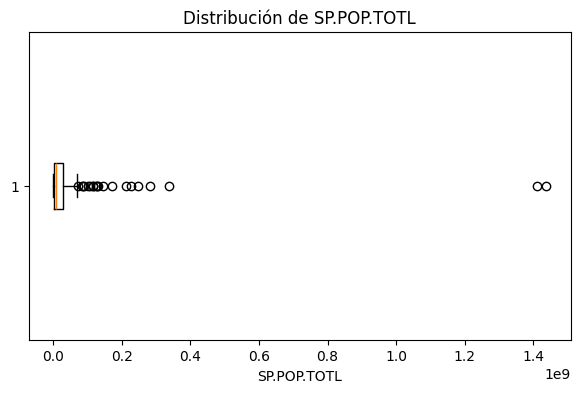

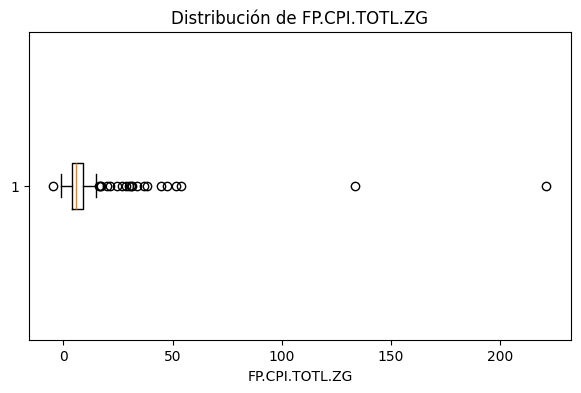

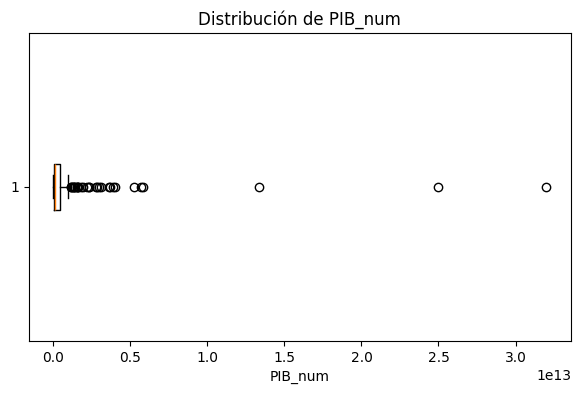

In [67]:
import matplotlib.pyplot as plt

for var in variables_outliers:
    plt.figure(figsize=(7,4))
    plt.boxplot(df_wb_raw[var].dropna(), vert=False)
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.show()


In [68]:
var = 'SP.POP.TOTL'

Q1 = df_wb_raw[var].quantile(0.25)
Q3 = df_wb_raw[var].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_var = df_wb_raw[
    (df_wb_raw[var] < lim_inf) | (df_wb_raw[var] > lim_sup)
]

outliers_var.shape[0]


20

Se identificaron 20 outliers en la variable población total, esto puede estar asociados a diferencias demográficas reales entre países.


In [69]:
var = 'PIB_num'

Q1 = df_wb_raw[var].quantile(0.25)
Q3 = df_wb_raw[var].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_pib = df_wb_raw[
    (df_wb_raw[var] < lim_inf) | (df_wb_raw[var] > lim_sup)
]


In [70]:
outliers_pib[['Country', 'PIB_num']] \
    .sort_values(by='PIB_num', ascending=False) \
    .head()



,Country,PIB_num
159,China,3.200488e+13
7,United States,2.497712e+13
116,India,1.337657e+13
50,Russian Federation,5.835482e+12
108,Japan,5.710167e+12


Los valores atípicos identificados en la distribución del PIB corresponden a países con economías significativamente más grandes al resto de la muestra. Entre los outliers superiores se encuentran economías como las de China, Estados Unidos, India, Rusia y Japon.

##Tabla  de estadisticas descriptivas

In [71]:
df_wb_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
SP.POP.GROW,198.0,1.152752e+00,1.576210e+00,-8.423008e+00,2.828784e-01,1.112108e+00,2.088224e+00,6.527050e+00
SP.POP.TOTL,198.0,3.999611e+07,1.484957e+08,9.816000e+03,1.373786e+06,7.335048e+06,2.936413e+07,1.438070e+09
SP.POP.TOTL.FE.IN,198.0,1.987776e+07,7.252840e+07,4.795000e+03,6.876850e+05,3.672054e+06,1.403224e+07,6.961863e+08
SP.POP.TOTL.FE.ZS,198.0,4.997349e+01,2.993389e+00,2.848374e+01,4.965188e+01,5.032928e+01,5.118944e+01,5.492088e+01
SP.POP.TOTL.MA.IN,198.0,2.011836e+07,7.598056e+07,5.021000e+03,6.826450e+05,3.560820e+06,1.424457e+07,7.418833e+08
SP.POP.TOTL.MA.ZS,198.0,5.002651e+01,2.993389e+00,4.507912e+01,4.881056e+01,4.967072e+01,5.034812e+01,7.151626e+01
SP.URB.GROW,198.0,1.729545e+00,1.826024e+00,-8.348151e+00,4.523152e-01,1.524572e+00,2.700316e+00,8.105580e+00
SP.URB.TOTL,198.0,2.289674e+07,8.019058e+07,6.283000e+03,8.540478e+05,4.463172e+06,1.624560e+07,9.244403e+08
SP.URB.TOTL.IN.ZS,198.0,6.220539e+01,2.272253e+01,1.505810e+01,4.336186e+01,6.362252e+01,7.954610e+01,1.000000e+02
SL.TLF.TOTL.FE.ZS,198.0,4.230033e+01,8.493360e+00,6.846247e+00,4.097022e+01,4.508194e+01,4.735822e+01,5.467084e+01


In [72]:
df_wb_raw.shape

(198, 42)

##Ahora veremos la distribucion del PIB, nuestra variable de interes.

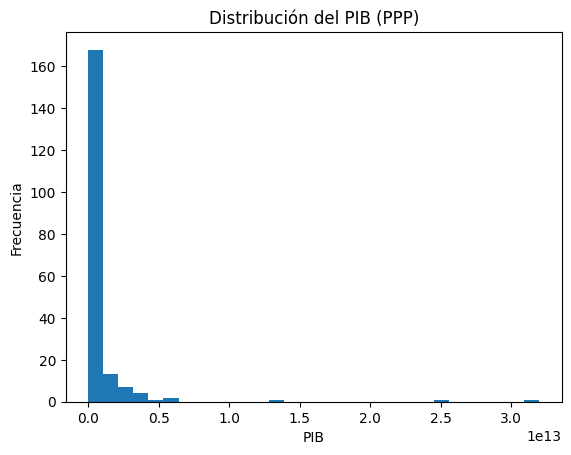

In [73]:
plt.hist(df_wb_raw['PIB_num'], bins=30)
plt.title("Distribución del PIB (PPP)")
plt.xlabel("PIB")
plt.ylabel("Frecuencia")
plt.show()


En el anterior grafico de histograma  podemos notar que la mayor parte de los paises se concentran en niveles relativamente bajos del PIB, lo que significa que podemos ver que la distribucion del PIB presenta una fuerte asimetria positiva. Ademas la presencia de outliers presentes en el graifco permiten reflejar las diferencias economicas entre los diferentes paises.

In [74]:
import plotly.express as px

fig = px.choropleth(
    df_wb_raw,
    locations='country',
    color='PIB_num',
    hover_name='Country',
    color_continuous_scale='Viridis',
    title='Distribución del PIB (PPP, constante 2021)'
)

fig.show()


El mapa evidencia una distribución geográfica del PIB a nivel mundial. Donde las economías con mayor PIB se concentran principalmente en América del Norte, Europa Occidental y Asia Oriental, mientras que regiones como África y parte de América Latina presentan niveles relativamente más bajos.

# Etapa 2: Reducción de dimensionalidad con PCA


El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.


Ahora seleccionaremos solo las variables numericas, excluyendo el PIB_num, ya que es nuestra variable objetivo y necesitamos que el PCA capture la estructura interna de los indicadores economicos sin incorporar informacion del resultado a predecir.

In [75]:
# Selección de variables numéricas
df_num = df_wb_raw.select_dtypes(include=['float64', 'int64'])

# Excluir el PIB numérico si se usará como variable objetivo
df_num = df_num.drop(columns=['PIB_num'])
df_num.head()

,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SL.TLF.TOTL.FE.ZS,...,BM.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.ZS
0,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,6420625.0,39.291937,49.843240,...,3.050000e+07,1.684321,0.96360,30.7,65.013,62.775,60.226,7.50,77.0,38.4266
1,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,9331708.0,45.028585,46.170619,...,1.532150e+08,2.324653,1.29050,9.2,68.673,66.349,63.936,2.30,16.8,33.0000
2,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,4486873.0,86.857687,45.081945,...,3.159065e+06,0.580098,1.40855,91.5,71.502,65.170,59.691,84.15,97.6,86.6377
3,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,38264181.0,38.129890,48.623244,...,-1.550000e+09,4.264071,50.18980,98.7,79.264,74.588,69.877,98.70,99.4,78.0800
4,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,71340.0,22.265197,46.126995,...,4.399200e+06,0.830619,0.00110,20.6,73.927,71.477,69.445,9.00,52.3,45.7313


##Estandarizar las variables

Ahora vamos a estandarizar las variables centrando cada variables en media 0 y la escala de desviacion estandar en 1, ya que esto nos asegura que todas las variables contribuyan de forma equilibrada al PCA, independientemente de su escala original.

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)


Una vez estandarizadas nuestras variables numericas, veremos cuanta informacion explica cada componente.

##Aplicamos PCA

In [77]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Aplicar PCA completo
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada por componente
var_explicada = pca.explained_variance_ratio_
var_acumulada = np.cumsum(var_explicada)


Creamos una tabla de varianza explicada

In [78]:
import pandas as pd

tabla_varianza = pd.DataFrame({
    'Componente': range(1, len(var_explicada) + 1),
    'Varianza explicada': var_explicada,
    'Varianza acumulada': var_acumulada
})

tabla_varianza.head(10)


,Componente,Varianza explicada,Varianza acumulada
0,1,0.263110,0.263110
1,2,0.210908,0.474018
2,3,0.109364,0.583382
3,4,0.087478,0.670860
4,5,0.075738,0.746598
5,6,0.044740,0.791338
6,7,0.033765,0.825103
7,8,0.029673,0.854776
8,9,0.028373,0.883149
9,10,0.026002,0.909151


Graficamos la varianza acumulada para ver cuantos componentes vamos a elegir

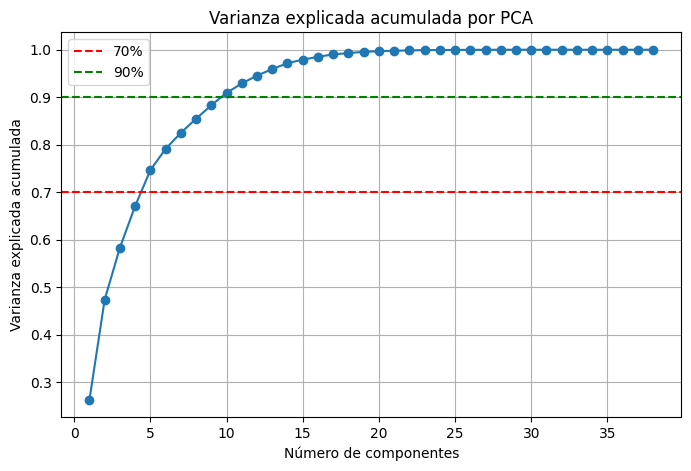

In [79]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(var_acumulada) + 1), var_acumulada, marker='o')
plt.axhline(y=0.7, color='r', linestyle='--', label='70%')
plt.axhline(y=0.9, color='g', linestyle='--', label='90%')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por PCA')
plt.legend()
plt.grid(True)
plt.show()


El gráfico de varianza explicada acumulada se muestra que los primeros componentes concentran gran parte de la información de los datos. En particular, se observa que alrededor de 5 componentes principales permiten capturar más del 70% de la varianza total, mientras que el 90% se alcanza aproximadamente con 10 componentes.


In [80]:
tabla_varianza[tabla_varianza['Varianza acumulada'] >= 0.7].head()


,Componente,Varianza explicada,Varianza acumulada
4,5,0.075738,0.746598
5,6,0.044740,0.791338
6,7,0.033765,0.825103
7,8,0.029673,0.854776
8,9,0.028373,0.883149


Elegimos un numero de componentes que explique al menos el 70% de la varianza, debido a que esto reduce la dimensionalidad y mantiene la informacion relevante, segun el principio de parsinomia. Por lo tanto nos quedaremos con 5 componentes principales.

In [81]:
n_componentes = 5


##Construccion del DataFrame con 7 componentes principales.

Una vez decidido el numero de componentes que es 7, y el PCA aplicado, ahora recalcularemos el PCA pero con los 7 compenentes y crearemos un Dataframe limpio para estudiar el modelo y generar predicciones.

Aplicacion de PCA con 7 componentes

In [86]:
from sklearn.decomposition import PCA

n_componentes = 5
pca_final = PCA(n_components=n_componentes)

X_pca_final = pca_final.fit_transform(X_scaled)


Creamos el dataframe con los componentes principales

In [87]:
import pandas as pd

columnas_pca = [f'PC{i+1}' for i in range(n_componentes)]

df_pca = pd.DataFrame(
    X_pca_final,
    columns=columnas_pca,
    index=df_wb_raw.index
)


Como anteriormente habiamos sacado la variable objetivo que corresponde al PIB categorico (NY.GDP.MKTP.PP.KD), ahora lo volveremos a agregar.

In [88]:
df_pca['NY.GDP.MKTP.PP.KD'] = df_wb_raw['NY.GDP.MKTP.PP.KD']


In [89]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,NY.GDP.MKTP.PP.KD
0,-1.824413,-3.718461,-0.139753,1.201409,-0.206234,Medium
1,-1.848223,-3.861049,-0.202842,-0.814425,-0.276063,Medium
2,-0.841066,-0.284357,-0.042718,-0.170836,0.166311,Medium-Low
3,1.216174,0.301010,0.993765,-0.286240,-2.085039,High
4,-1.649400,-2.790831,-0.277981,-0.867607,-0.669647,Low


# **Etapa Final: Implementación y Comparación de Modelos de Clasificación**

En esta etapa final del proyecto se procede a la implementación de modelos de clasificación, con el propósito de evaluar el efecto de la reducción de dimensionalidad sobre el desempeño predictivo y la estructura del problema. Las fases de proyecto son las siguientes:

En primer lugar, se construyen dos modelos de clasificación utilizando el conjunto de datos original, es decir, considerando la totalidad de las variables explicativas sin aplicar técnicas de reducción de dimensionalidad. Esta aproximación permite establecer una línea base (baseline) para el análisis comparativo posterior.

Posteriormente, se desarrollan los mismos modelos de clasificación empleando como variables de entrada las componentes principales obtenidas en la etapa de reducción de dimensionalidad mediante PCA. De esta forma, se evalúa si la representación reducida de los datos logra preservar información relevante para la tarea de clasificación.

Ambos enfoques se implementan bajo condiciones metodológicas comparables, manteniendo criterios consistentes de partición de datos y métricas de evaluación. El desempeño de los modelos se analiza mediante indicadores adecuados al problema de clasificación, permitiendo contrastar los resultados obtenidos con datos originales y con datos reducidos.

Finalmente, se realiza un análisis comparativo de los resultados, discutiendo las ventajas y limitaciones de cada enfoque, así como el impacto del uso de PCA en términos de desempeño, interpretabilidad y complejidad del modelo. Esta etapa cierra el proyecto integrando los aprendizajes obtenidos a lo largo de las fases previas y fundamentando las decisiones analíticas adoptadas.

# **Construccion de dos modelos de clasificacion con el conjunto de datos original** /Random  forest y Arbol de decision

Determinamos variable explicada y utilizamos datos estandarizados

In [90]:
y = df_wb_raw["NY.GDP.MKTP.PP.KD"]

Estandarizamos los datos

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)


# **Aplicamos el Modelo Random Forest**

In [97]:
# Importar biblioteca
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X_original = X_scaled
y_original = df_wb_raw['NY.GDP.MKTP.PP.KD']


X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.3, random_state=42, stratify=y_original)

In [98]:
#@title Instanciar algoritmo de clasificación RFC
rfc_clf = RandomForestClassifier(
    random_state=0,
    class_weight="balanced",
    n_estimators=100
)
# Aplicar modelo a datos de entrenamietno
classifier = rfc_clf.fit(X_train, y_train)

In [99]:
#@title Generar predicciones con datos test
y_pred_rfc = classifier.predict(X_test)

In [100]:
#@title importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score, ConfusionMatrixDisplay,
                             cohen_kappa_score, roc_auc_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [118]:
#@title Función para generar métricas
def fn_metricas_clasificacion(y_true, y_pred):
  print('Accuracy     : %.3f' % accuracy_score(y_true, y_pred))
  print("Precisión    : {}".format(precision_score(y_true, y_pred, pos_label=1, average='weighted')))
  print("Recall       : {}".format(recall_score(y_true, y_pred, pos_label=1, average='weighted')))
  print("Puntuación F1: {}".format(f1_score(y_true, y_pred, pos_label=1, average='weighted')))
  print("Cohen Kappa  : {}".format(cohen_kappa_score(y_true, y_pred)))


In [119]:
#@title Crear función para visualizar métricas
def fn_metricas_info(modelo, y_verdadero, y_calculado):
    metrics = {
        'Accuracy': "%.5f" % accuracy_score(y_verdadero, y_calculado),
        'Precisión': "{}".format(precision_score(y_verdadero, y_calculado, pos_label=1, average='weighted')),
        'Recall': "{}".format(recall_score(y_verdadero, y_calculado, pos_label=1, average='weighted')),
        'Puntuación F1': "{}".format(f1_score(y_verdadero, y_calculado, pos_label=1, average='weighted')),
        'Cohen Kappa': "{}".format(cohen_kappa_score(y_verdadero, y_calculado))
    }
    return pd.DataFrame(metrics, index=[modelo])

In [120]:
df_wb_raw['NY.GDP.MKTP.PP.KD'].unique()

['Medium', 'Medium-Low', 'High', 'Low', 'Medium-High']
Categories (5, object): ['Low' < 'Medium-Low' < 'Medium' < 'Medium-High' < 'High']

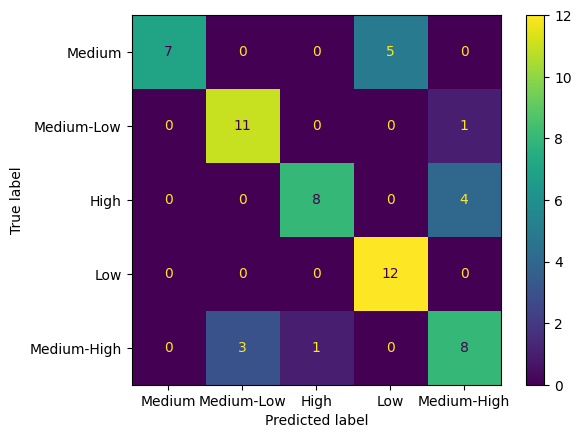

In [121]:
#@title Generar matriz de confusión
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_rfc)
ConfusionMatrixDisplay(cm, display_labels=['Medium', 'Medium-Low', 'High', 'Low', 'Medium-High']).plot()
plt.show()

In [122]:
#@title Mostrar métricas
fn_metricas_clasificacion(y_test, y_pred_rfc)

Accuracy     : 0.767
Precisión    : 0.7991740285857933
Recall       : 0.7666666666666667
Puntuación F1: 0.7624973840436635
Cohen Kappa  : 0.7083333333333333


Gracias a las metricas podemos determinar que el modelo clasifica correctamente el 76,6% de los paises, tiene un nivel de precision del 80%


In [123]:
#@title Mostrar Reporte
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

        High       1.00      0.58      0.74        12
         Low       0.79      0.92      0.85        12
      Medium       0.89      0.67      0.76        12
 Medium-High       0.71      1.00      0.83        12
  Medium-Low       0.62      0.67      0.64        12

    accuracy                           0.77        60
   macro avg       0.80      0.77      0.76        60
weighted avg       0.80      0.77      0.76        60



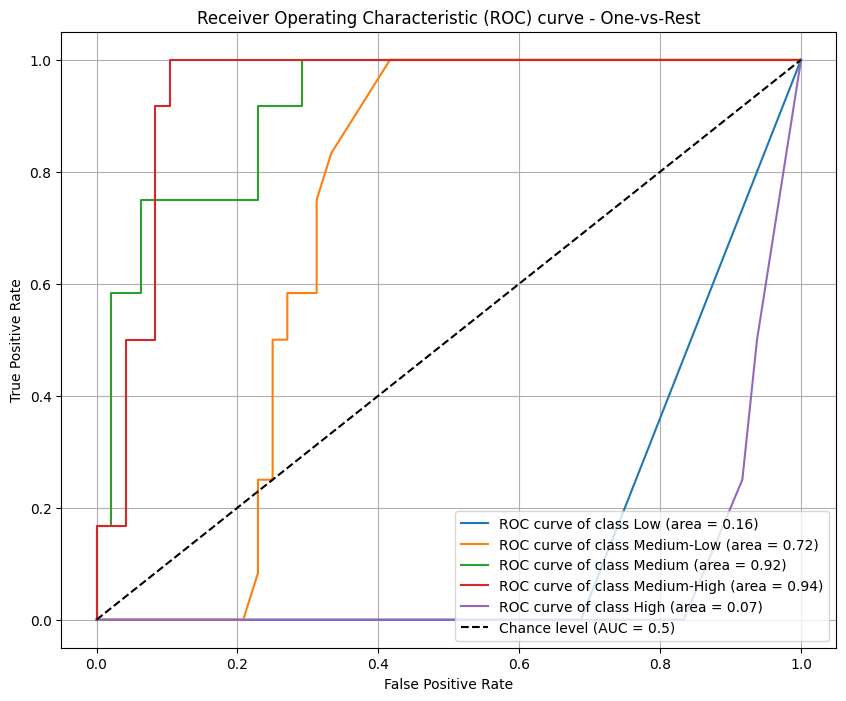

In [124]:
#@title Curva ROC (Multi-clase - One-vs-Rest)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=y_test.cat.categories)
n_classes = y_test_bin.shape[1]

# Get decision function scores for each class
# Use predict_proba for Random Forest
y_score = rfc_clf.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of class {y_test.cat.categories[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve - One-vs-Rest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **Aplicamos Modelo de clasificacion: Arbol de Decision**


In [125]:
#@title Instanciar algoritmo de clasificación usando criterio de entropía y ajustar modelo.
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=111)

# Aplicar modelo a datos de entrenamietno
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=111)

In [126]:
#@title Generar predicciones a datos de test
y_test_pred = tree_clf.predict(X_test)

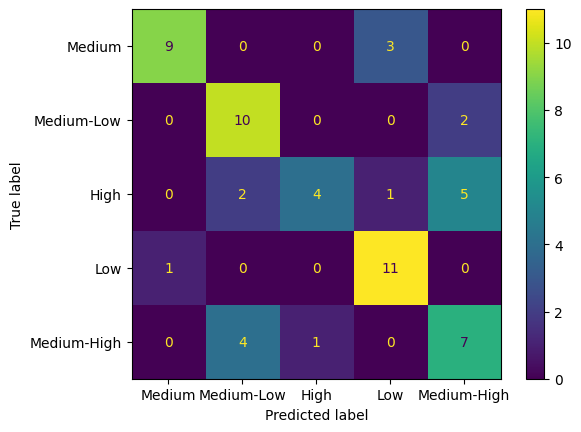

In [128]:
#@title Generar matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm, display_labels=['Medium', 'Medium-Low', 'High', 'Low', 'Medium-High']).plot()
plt.show()

In [129]:
#@title Mostrar métricas
fn_metricas_clasificacion(y_test, y_test_pred)

Accuracy     : 0.683
Precisión    : 0.7116666666666667
Recall       : 0.6833333333333333
Puntuación F1: 0.6712664242076006
Cohen Kappa  : 0.6041666666666667


In [130]:
#@title Mostrar Reporte
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        High       0.90      0.75      0.82        12
         Low       0.62      0.83      0.71        12
      Medium       0.80      0.33      0.47        12
 Medium-High       0.73      0.92      0.81        12
  Medium-Low       0.50      0.58      0.54        12

    accuracy                           0.68        60
   macro avg       0.71      0.68      0.67        60
weighted avg       0.71      0.68      0.67        60



In [136]:
#Area bajo la curva
# Pass the full probability array for multiclass ROC AUC
pred_prob = tree_clf.predict_proba(X_test)
# Ensure labels are explicitly provided for multiclass roc_auc_score
roc_auc = roc_auc_score(y_test, pred_prob, multi_class="ovo", labels=tree_clf.classes_)
print(f"AUC modelo base: {roc_auc:.3f}")

AUC modelo base: 0.802


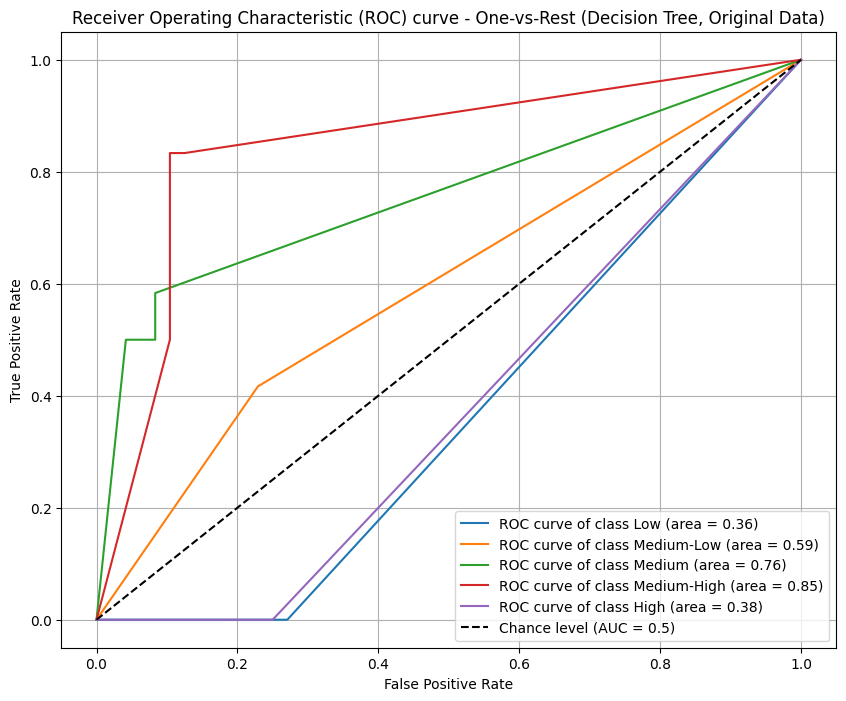

In [148]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = label_binarize(y_test, classes=y_test.cat.categories)
n_classes = y_test_bin.shape[1]

# Get decision function scores for each class
y_score = modelo_final.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of class {y_test.cat.categories[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve - One-vs-Rest (Decision Tree, Original Data)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [142]:
# Generar las particiones

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Generar diccionario con los hiperparámetros a aplicar
param_grid = {"criterion":["gini", "entropy"],
              "max_depth":[4,6,8,10],
              "min_samples_split":[6,8,10,15]}

# Instanciar el modelo sin hiperparámetros
tree = DecisionTreeClassifier(class_weight="balanced",random_state=0)

# Aplicar GridSearchCV  usando el diccionario de hiperparámetros
mejor_modelo_arbol = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)
# Entrenar el modelo con datos train
mejor_modelo_arbol.fit(X_train, y_train)

# Obtener los mejores parámetros
mejor_modelo_arbol.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 8}

In [143]:
#@title Obtener el mejor modelo
modelo_final = mejor_modelo_arbol.best_estimator_

# Obtener predicciones con el set de test
y_pred = modelo_final.predict(X_test)

# Imprimir reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.88      0.58      0.70        12
         Low       0.56      0.75      0.64        12
      Medium       0.60      0.50      0.55        12
 Medium-High       0.62      0.83      0.71        12
  Medium-Low       0.50      0.42      0.45        12

    accuracy                           0.62        60
   macro avg       0.63      0.62      0.61        60
weighted avg       0.63      0.62      0.61        60



In [146]:
#@title Métricas del modelo
metrica = fn_metricas_info('arbol_decision', y_test, y_pred)
metrica

,Accuracy,Precisión,Recall,Puntuación F1,Cohen Kappa
arbol_decision,0.61667,0.6325000000000001,0.6166666666666667,0.6114285714285714,0.5208333333333333


# **Construccion de dos modelos de clasificacion con el conjunto de datos PCA**

**Random Forest**

In [156]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,NY.GDP.MKTP.PP.KD
0,-1.824413,-3.718461,-0.139753,1.201409,-0.206234,Medium
1,-1.848223,-3.861049,-0.202842,-0.814425,-0.276063,Medium
2,-0.841066,-0.284357,-0.042718,-0.170836,0.166311,Medium-Low
3,1.216174,0.301010,0.993765,-0.286240,-2.085039,High
4,-1.649400,-2.790831,-0.277981,-0.867607,-0.669647,Low


In [154]:
# Importar biblioteca
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X_original = df_pca.drop(columns=['NY.GDP.MKTP.PP.KD'])
y_original = df_pca['NY.GDP.MKTP.PP.KD']


X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.3, random_state=42, stratify=y_original)

In [164]:
#@title Instanciar algoritmo de clasificación RFC
rfc_clf = RandomForestClassifier(
    random_state=0,
    class_weight="balanced",
    n_estimators=100
)
# Aplicar modelo a datos de entrenamietno
classifier = rfc_clf.fit(X_train, y_train)

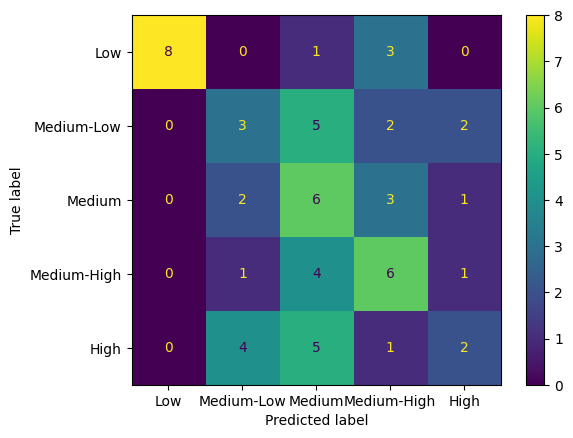

In [165]:
#@title Generar predicciones con datos test
y_pred_rfc = classifier.predict(X_test)


matrizxconfucion = confusion_matrix(y_true=y_test, y_pred=y_pred_rfc)

display_labels = y_test.cat.categories
ConfusionMatrixDisplay(matrizxconfucion, display_labels=display_labels).plot()
plt.show()


In [166]:
def fn_metricas_clasificacion(y_true, y_pred):
  print('Accuracy     : %.3f' % accuracy_score(y_true, y_pred))
  print("Precisión    : {}".format(precision_score(y_true, y_pred, pos_label=1, average='weighted')))
  print("Recall       : {}".format(recall_score(y_true, y_pred,pos_label=1, average='weighted')))
  print("Puntuación F1: {}".format(f1_score(y_true, y_pred,pos_label=1, average='weighted')))
  print("Cohen Kappa  : {}".format(cohen_kappa_score(y_true, y_pred)))




In [167]:
fn_metricas_clasificacion(y_test, y_pred_rfc)

Accuracy     : 0.417
Precisión    : 0.46380952380952384
Recall       : 0.4166666666666667
Puntuación F1: 0.42060606060606065
Cohen Kappa  : 0.27083333333333337


El modelo de random Forest utilizando los datos PCA nos da una prediccion de 46%, explicando el 41% del comportamiento de los paises

In [169]:
#@title Mostrar Reporte
print(classification_report(y_test, y_pred_rfc))


              precision    recall  f1-score   support

        High       1.00      0.67      0.80        12
         Low       0.30      0.25      0.27        12
      Medium       0.29      0.50      0.36        12
 Medium-High       0.40      0.50      0.44        12
  Medium-Low       0.33      0.17      0.22        12

    accuracy                           0.42        60
   macro avg       0.46      0.42      0.42        60
weighted avg       0.46      0.42      0.42        60



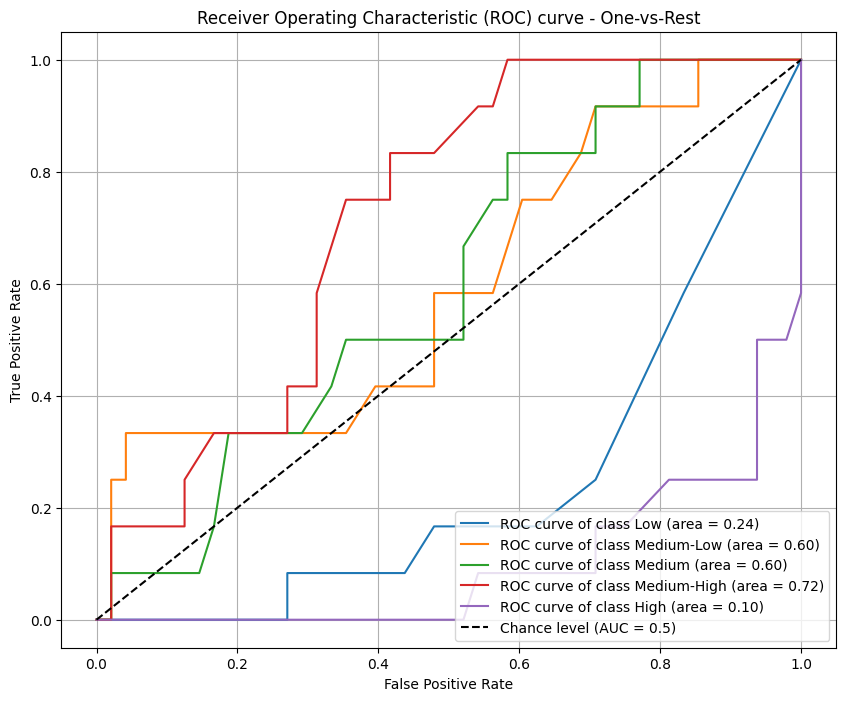

In [170]:
#@title Curva ROC (Multi-clase - One-vs-Rest)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=y_test.cat.categories)
n_classes = y_test_bin.shape[1]

# Get decision function scores for each class
# Use predict_proba for Random Forest
y_score = rfc_clf.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of class {y_test.cat.categories[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve - One-vs-Rest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Arbol de Decision con datos PCA**

In [172]:
#@title Instanciar algoritmo de clasificación usando criterio de entropía y ajustar modelo.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report # Ensure these are imported if not already

arbol_clf = DecisionTreeClassifier(criterion="entropy", random_state=111)

# Aplicar modelo a datos de entrenamiento
arbol_clf.fit(X_train, y_train)

# Generar predicciones para el conjunto de prueba (PCA)
y_pred_arbol_pca = arbol_clf.predict(X_test)

print(f"Accuracy del modelo Árbol de Decisión (datos con PCA): {accuracy_score(y_test, y_pred_arbol_pca):.4f}")
print("\nReporte de Clasificación (datos con PCA):")
print(classification_report(y_test, y_pred_arbol_pca))

Accuracy del modelo Árbol de Decisión (datos con PCA): 0.3167

Reporte de Clasificación (datos con PCA):
              precision    recall  f1-score   support

        High       0.62      0.42      0.50        12
         Low       0.29      0.42      0.34        12
      Medium       0.25      0.33      0.29        12
 Medium-High       0.25      0.25      0.25        12
  Medium-Low       0.29      0.17      0.21        12

    accuracy                           0.32        60
   macro avg       0.34      0.32      0.32        60
weighted avg       0.34      0.32      0.32        60



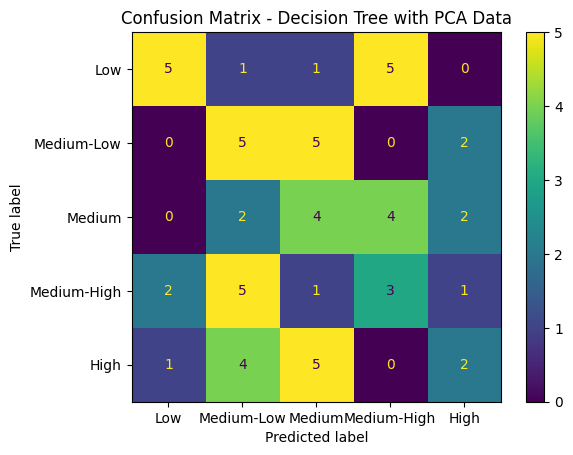

In [174]:
# Generar matriz de confusión para el modelo con PCA
cm_arbol_pca = confusion_matrix(y_true=y_test, y_pred=y_pred_arbol_pca)
display_labels_arbol_pca = y_test.cat.categories
ConfusionMatrixDisplay(cm_arbol_pca, display_labels=display_labels_arbol_pca).plot()
plt.title('Confusion Matrix - Decision Tree with PCA Data')
plt.show()

In [178]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output (using y_test as it contains the target labels for PCA data)
y_test_bin_pca = label_binarize(y_test, classes=y_test.cat.categories)
n_classes_pca = y_test_bin_pca.shape[1]


y_score_pca_arbol = arbol_clf.predict_proba(X_test)


roc_auc_pca_arbol = roc_auc_score(y_test, y_score_pca_arbol, multi_class='ovr', average='weighted')
print(f"AUC modelo Árbol de Decisión (datos con PCA): {roc_auc_pca_arbol:.3f}")



AUC modelo Árbol de Decisión (datos con PCA): 0.573


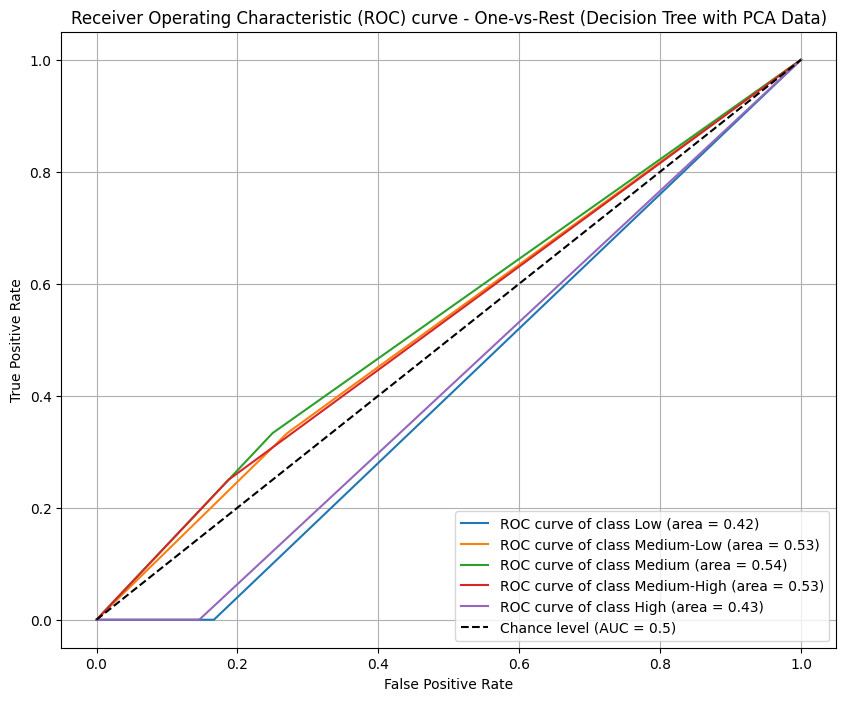

In [179]:
# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes_pca):
    fpr, tpr, _ = roc_curve(y_test_bin_pca[:, i], y_score_pca_arbol[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of class {y_test.cat.categories[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve - One-vs-Rest (Decision Tree with PCA Data)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

En conclusion podemos ver que los modelos de clasificacion utilizados con el conjunto de datos original tienen mejor precision y ajuste en comparacion a los modelos de clasificacion determinados a partir del PCA, esto se debe a que como en la base de datos orginal hay mas variables explicativas que, valga la rebundancia, explican al pib, esto mejora su precision. En cambio como con el PCA solo contamos con 5 componentes que si bien explican mas del 70% de la varianza, al ver menos variables puede predecir de menor forma al PIB